In [1]:
path_to_file = "../logs/results/"

data = {
    "0": {
        "fb": {
            "files": ["metrics_dynamic-connectivity-ett_0_facebook_combined.log", 
                        "metrics_dynamic-connectivity-incremental_0_facebook_combined.log", 
                        "metrics_dynamic-connectivity-lct_0_facebook_combined.log"],
            "names": ["Euler Tour Tree", "Incremental", "Link-Cut Tree"],
            "data_len": 88234
        },
        "email": {
            "files": ["metrics_dynamic-connectivity-ett_0_Email-EuAll.log",
                        "metrics_dynamic-connectivity-incremental_0_Email-EuAll.log",
                        "metrics_dynamic-connectivity-lct_0_Email-EuAll.log"],
            "names": ["Euler Tour Tree", "Incremental", "Link-Cut Tree"],
            "data_len": 420045
        },
        "notre": {
            "files": ["metrics_dynamic-connectivity-ett_0_web-NotreDame.log",
                      "metrics_dynamic-connectivity-incremental_0_web-NotreDame.log",
                      "metrics_dynamic-connectivity-lct_0_web-NotreDame.log"],
            "names": ["Euler Tour Tree", "Incremental", "Link-Cut Tree"],
            "data_len": 1497134
        }
    },
    "1": {
        "fb": {
            "files": ["metrics_dynamic-connectivity-ett_1_facebook_combined.log", 
                        "metrics_dynamic-connectivity-lct_1_facebook_combined.log"],
            "names": ["Euler Tour Tree", "Link-Cut Tree"],
            "data_len": 88234
        },
        "email": {
            "files": ["metrics_dynamic-connectivity-ett_1_Email-EuAll.log",
                        "metrics_dynamic-connectivity-lct_1_Email-EuAll.log"],
            "names": ["Euler Tour Tree", "Link-Cut Tree"],
            "data_len": 420045
        },
        "notre": {
            "files": ["metrics_dynamic-connectivity-ett_1_web-NotreDame.log",
                      "metrics_dynamic-connectivity-lct_1_web-NotreDame.log"],
            "names": ["Euler Tour Tree", "Link-Cut Tree"],
            "data_len": 1497134
        }
    },
    "2": {
        "fb": {
            "files": ["metrics_dynamic-connectivity-ett_2_facebook_combined.log", 
                        "metrics_dynamic-connectivity-lct_2_facebook_combined.log"],
            "names": ["Euler Tour Tree", "Link-Cut Tree"],
            "data_len": 88234
        },
        "email": {
            "files": ["metrics_dynamic-connectivity-ett_2_Email-EuAll.log",
                        "metrics_dynamic-connectivity-lct_2_Email-EuAll.log"],
            "names": ["Euler Tour Tree", "Link-Cut Tree"],
            "data_len": 420045
        },
        "notre": {
            "files": ["metrics_dynamic-connectivity-ett_2_web-NotreDame.log",
                      "metrics_dynamic-connectivity-lct_2_web-NotreDame.log"],
            "names": ["Euler Tour Tree", "Link-Cut Tree"],
            "data_len": 1497134
        }
    },
}

In [2]:
import matplotlib.pyplot as plt

def read_integers(filename):
    """Read integers from a file (one per line)."""
    with open(filename, "r") as f:
        return [int(line.strip()) for line in f]

def plot_measurements(file_data, mode, source):
    file_name = file_data["files"]
    algo_name = file_data["names"]
    data_len = file_data["data_len"]

    data_sources = []
    for f in file_name:
        data_sources.append(read_integers(path_to_file + f))
    min_len = min(min(len(data) for data in data_sources), data_len)
    x = [i for i in range(min_len)]

    data_sources = [data[:min_len] for data in data_sources]

    for i, data in enumerate(data_sources):
        plt.plot(x, data, linestyle='-', linewidth=3, label=algo_name[i])

    plt.xlabel("Amount of edges")
    plt.ylabel("Nanoseconds")
    plt.title(f'Comparison of {len(algo_name)} Measurements')
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()

    # plt.show()
    plt.savefig("../plots/summary/summaryPlotOf"+"_"+mode+"_"+source+".png")
    plt.close()

def plot_measurements_combined(mode):
    """
    Plot all sources (fb, email, notre) for a given mode into one figure with subplots.
    """
    sources = list(data[mode].keys())
    num_sources = len(sources)
    fig, axs = plt.subplots(1, num_sources, figsize=(7 * num_sources, 6), squeeze=False)

    for idx, source in enumerate(sources):
        file_data = data[mode][source]
        file_name = file_data["files"]
        algo_name = file_data["names"]
        data_len = file_data["data_len"]

        data_sources = []
        for f in file_name:
            data_sources.append(read_integers(path_to_file + f))
        min_len = min(min(len(data) for data in data_sources), data_len)
        x = [i for i in range(min_len)]
        data_sources = [d[:min_len] for d in data_sources]

        ax = axs[0, idx]
        for i, d in enumerate(data_sources):
            ax.plot(x, d, linestyle='-', linewidth=3, label=algo_name[i])
        ax.set_xlabel("Amount of edges")
        ax.set_ylabel("Nanoseconds")
        if source == 'fb':
            ax.set_title(f"Facebook Combined")
        elif source == 'notre':
            ax.set_title(f"Web Notre Dame")
        ax.legend(fontsize=12)
        ax.grid(True)

    plt.suptitle(f"Comparison of Measurements for Mode {mode}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f"../plots/summary/combinedPlot_Mode_{mode}.png")
    plt.close()


def plot_measurements_fb_notre_combined(mode):
    """
    Plot only facebook_combined (fb) and web_NotreDame (notre) for a given mode into one figure with two subplots.
    """
    selected_sources = ["fb", "notre"]
    fig, axs = plt.subplots(1, 2, figsize=(14, 6), squeeze=False)

    for idx, source in enumerate(selected_sources):
        file_data = data[mode][source]
        file_name = file_data["files"]
        algo_name = file_data["names"]
        data_len = file_data["data_len"]

        data_sources = []
        for f in file_name:
            data_sources.append(read_integers(path_to_file + f))
        min_len = min(min(len(data) for data in data_sources), data_len)
        x = [i for i in range(min_len)]
        data_sources = [d[:min_len] for d in data_sources]

        ax = axs[0, idx]
        for i, d in enumerate(data_sources):
            ax.plot(x, d, linestyle='-', linewidth=3, label=algo_name[i])
        ax.set_xlabel("Amount of edges")
        ax.set_ylabel("Nanoseconds")
        if source == 'fb':
            ax.set_title(f"Facebook Combined")
        elif source == 'notre':
            ax.set_title(f"Web Notre Dame")
        ax.legend(fontsize=12)
        ax.grid(True)

    plt.suptitle(f"Comparison for facebook_combined and web_NotreDame (Mode {mode})", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f"../plots/summary/combinedPlot_fb_notre_Mode_{mode}.png")
    plt.close()


def plotAll():
    for mode in data.keys():
        for source in data[mode].keys():
                plot_measurements(data[mode][source], mode, source)

def plotAllCombined():
    for mode in data.keys():
        plot_measurements_fb_notre_combined(mode)

if __name__ == "__main__":
    # plot_measurements(data["2"]["fb"], 2, 'fb')
    plotAllCombined()
    plotAll()
    # pass

In [3]:
import numpy as np

def calculateAvgFor(file_data, mode, source):
    file_name = file_data["files"]
    algo_name = file_data["names"]
    data_len = file_data["data_len"]

    data_sources = []
    for f in file_name:
        data_sources.append(read_integers(path_to_file + f))
    min_len = min(min(len(data) for data in data_sources), data_len)

    results = {}
    data_sources = [data[:min_len] for data in data_sources]
    for i, data_s in enumerate(data_sources):
        print(f"        File: {file_name[i]},"+" "*(70-len(file_name[i]))+f" Average: {np.mean(data_s)}")
        # results[file_name[i]] = np.mean(data_s)
    # return results

def calculateAvg():
    for mode in data.keys():
        print(f"Mode: {mode}")
        for source in data[mode].keys():
                print(f"    Source: {source}")
                calculateAvgFor(data[mode][source], mode, source)
    
if __name__ == "__main__":
    calculateAvg()

Mode: 0
    Source: fb
        File: metrics_dynamic-connectivity-ett_0_facebook_combined.log,               Average: 51.525829045492664
        File: metrics_dynamic-connectivity-incremental_0_facebook_combined.log,       Average: 1.9552553437450415
        File: metrics_dynamic-connectivity-lct_0_facebook_combined.log,               Average: 11.74011152163565
    Source: email
        File: metrics_dynamic-connectivity-ett_0_Email-EuAll.log,                     Average: 19.518701567689178
        File: metrics_dynamic-connectivity-incremental_0_Email-EuAll.log,             Average: 1.5645109452558654
        File: metrics_dynamic-connectivity-lct_0_Email-EuAll.log,                     Average: 4.673354045399898
    Source: notre
        File: metrics_dynamic-connectivity-ett_0_web-NotreDame.log,                   Average: 30.418806199044308
        File: metrics_dynamic-connectivity-incremental_0_web-NotreDame.log,           Average: 2.1293464713245442
        File: metrics_dynamic-c

In [5]:
path_to_file_mem = "../logs/metrics/"

data_mem = {}

def transform_data_to_data_mem():
    for mode in data.keys():
        data_mem[mode] = {}
        for source in data[mode].keys():
            files = data[mode][source]["files"]
            files_mem = []
            for file in files:
                files_mem.append(file.replace(".log", "_jobmanager.csv"))
                files_mem.append(file.replace(".log", "_taskmanager.csv"))

            data_mem[mode][source] = {
                "files": files_mem,
                "names": data[mode][source]["names"],
            }
    return data_mem

def json_pretty_print(json_data):
    for mode in json_data.keys():
        print(f"Mode: {mode}")
        for source in json_data[mode].keys():
            print(f"    Source: {source}")
            for file in json_data[mode][source]["files"]:
                print(f"        File: {file}")

if __name__ == "__main__":
    data_mem = transform_data_to_data_mem()
    json_pretty_print(data_mem)

Mode: 0
    Source: fb
        File: metrics_dynamic-connectivity-ett_0_facebook_combined_jobmanager.csv
        File: metrics_dynamic-connectivity-ett_0_facebook_combined_taskmanager.csv
        File: metrics_dynamic-connectivity-incremental_0_facebook_combined_jobmanager.csv
        File: metrics_dynamic-connectivity-incremental_0_facebook_combined_taskmanager.csv
        File: metrics_dynamic-connectivity-lct_0_facebook_combined_jobmanager.csv
        File: metrics_dynamic-connectivity-lct_0_facebook_combined_taskmanager.csv
    Source: email
        File: metrics_dynamic-connectivity-ett_0_Email-EuAll_jobmanager.csv
        File: metrics_dynamic-connectivity-ett_0_Email-EuAll_taskmanager.csv
        File: metrics_dynamic-connectivity-incremental_0_Email-EuAll_jobmanager.csv
        File: metrics_dynamic-connectivity-incremental_0_Email-EuAll_taskmanager.csv
        File: metrics_dynamic-connectivity-lct_0_Email-EuAll_jobmanager.csv
        File: metrics_dynamic-connectivity-lct_0_E

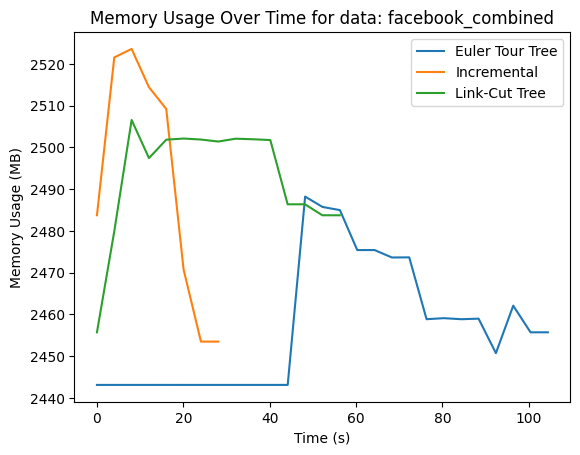

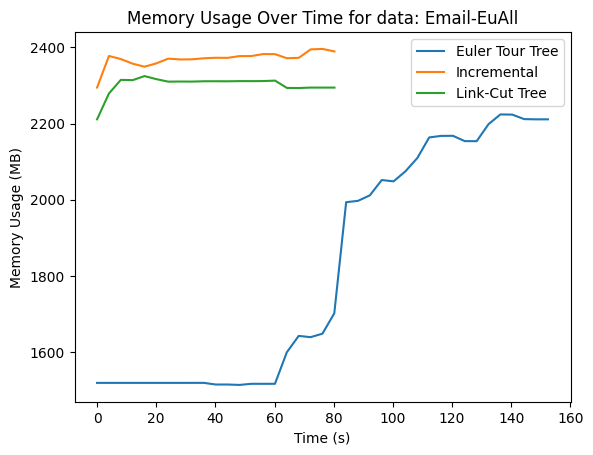

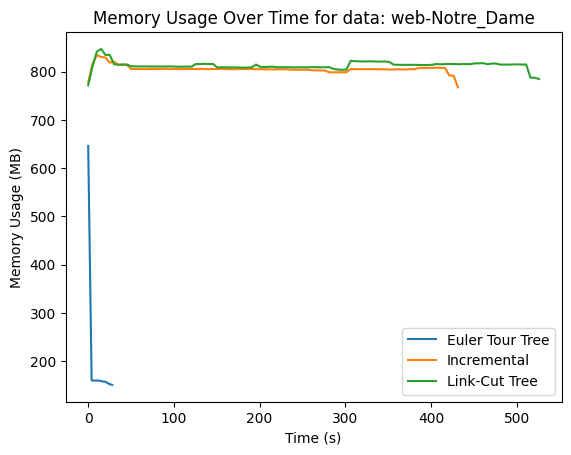

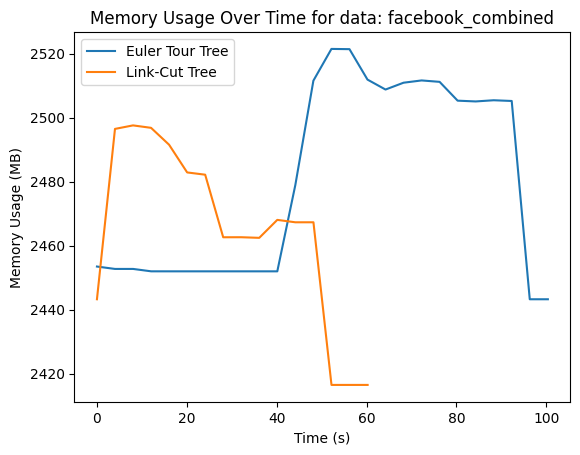

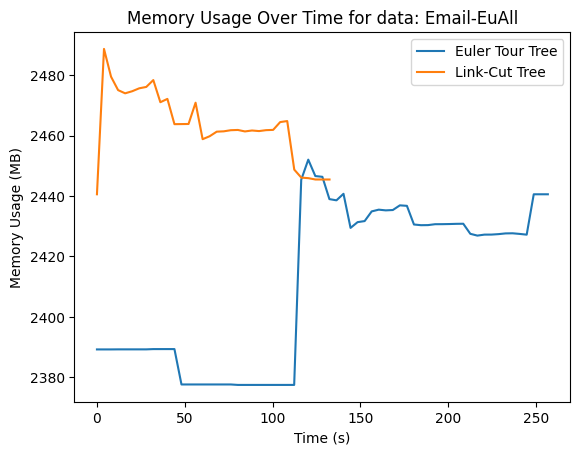

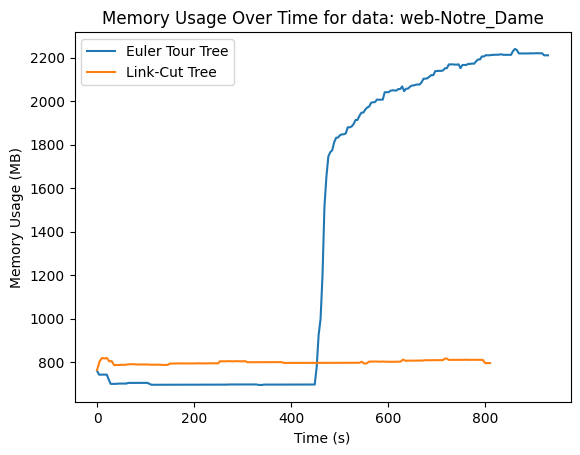

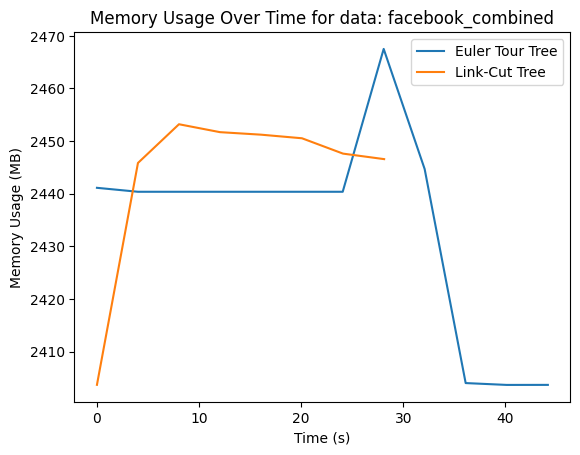

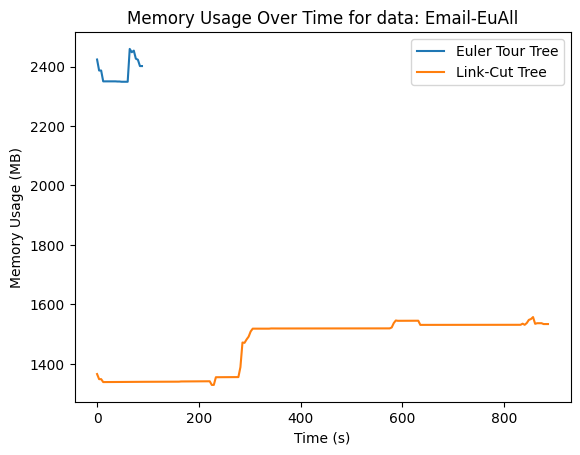

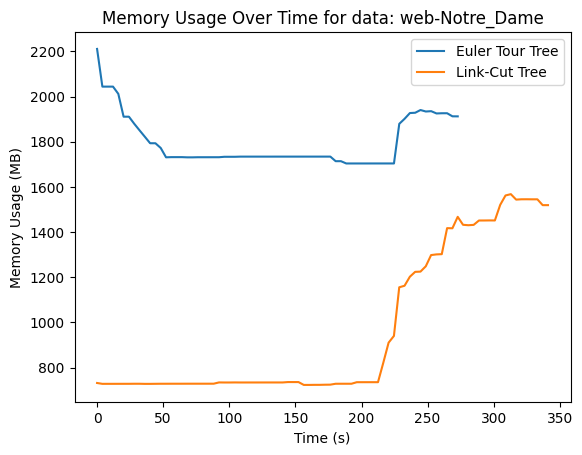

<Figure size 640x480 with 0 Axes>

In [6]:
import pandas as pd

def plot_mem(mode, source):
    files = data_mem[mode][source]["files"]
    names = data_mem[mode][source]["names"]

    for i, file in enumerate(files):
        if i % 2 == 0:
            continue
        df = pd.read_csv(path_to_file_mem + file)
        df['timestamp'] = df["timestamp"] - df["timestamp"][0]
        plt.plot(df['timestamp'], df['usage_MB'], label=names[i//2])

    plt.xlabel("Time (s)")
    plt.ylabel("Memory Usage (MB)")
    if source == 'fb':
        plt.title(f"Memory Usage Over Time for data: facebook_combined")
    elif source == 'notre':
        plt.title(f"Memory Usage Over Time for data: web-Notre_Dame")
    elif source == 'email':
        plt.title(f"Memory Usage Over Time for data: Email-EuAll")
    # plt.title(f"Memory Usage Over Time for data: {source}")
    plt.legend(fontsize=10)
    plt.show()
    plt.savefig(f"../plots/summary/memory_usage_{mode}_{source}.png")

def plot_for_files():
    for mode in ["0", "1", "2"]:
        for source in ["fb", "email", "notre"]:
            plot_mem(mode, source)

if __name__ == "__main__":
    plot_for_files()